## Observations and Insights 

In [40]:
#1. There is a strong, positive linear association between Mouse weight and Avg Tumor Volume 
#   as seen in 2nd plot (scatter) of line and scatter plots section
#2. Mouse g989 was the only mouse in this experiment to be dropped as it had a dupicated time point.
#3. Of the selected treatments used in the 'Qartiles, Outliers, and Boxplot' section, Infubinol had the highest 
# median and mean Tumor Volume.


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df=pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)




In [41]:
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [42]:
mouse_df.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [43]:
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [44]:
study_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [45]:
# Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.


# Use the cleaned data for the remaining steps.


# Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.


# Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the total number of timepoints for all mice tested for each drug regimen throughout the course of the study.
# NOTE: These plots should look identical.


# Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female or male mice in the study.
# NOTE: These plots should look identical.


# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.


# Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
# Hint: All four box plots should be within the same figure. Use this Matplotlib documentation page for help with changing the style of the outliers.


# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.


# Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.


# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.


# Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.


# Here are some final considerations:


# You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, x-axis and y-axis limits, etc.


# See the starter workbook for help on what modules to import and expected format of the notebook.



# Hints and Considerations


# Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.


# You have been provided a starter notebook. Use the code comments as a reminder of steps to follow as you complete the assignment.


# Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always revisit old problems.


# While you are trying to complete this assignment, feel encouraged to constantly refer to Stack Overflow and the Pandas documentation. These are needed tools in every data analyst's tool belt.


# Remember, there are many ways to approach a data problem. The key is to break up your task into micro tasks. Try answering questions like:


# How does my DataFrame need to be structured for me to have the right x-axis and y-axis?


# How do I build a basic scatter plot?


# How do I add a label to that scatter plot?


# Where would the labels for that scatter plot come from?


# Again, don't let the magnitude of a programming task scare you off. Ultimately, every programming problem boils down to a handful of bite-sized tasks.


# Get help when you need it! There is never any shame in asking. But, as always, ask a specific question. You'll never get a great answer to "I'm lost."

In [46]:
mouse_df.value_counts()
study_df.value_counts()
#I tried both keep as False and first, but kept first in. the directions say to drop any data associated, but i am not sure what 
#that actually means. I would think it means use false but I am not too sure
clean_study= study_df.drop_duplicates(subset =['Mouse ID','Timepoint'],keep = False)
clean_study.value_counts()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
a203      0          45.000000           0                   1
q610      0          45.000000           0                   1
q633      20         53.287287           1                   1
          15         50.583557           1                   1
          10         49.001866           0                   1
                                                            ..
i334      20         39.687832           0                   1
          15         39.158001           0                   1
          10         41.631247           0                   1
          5          41.020518           0                   1
z969      45         73.867845           4                   1
Length: 1883, dtype: int64

In [47]:
merged_unclean = pd.merge(mouse_df, study_df, on='Mouse ID', how='outer')

merged = pd.merge(mouse_df, clean_study, on='Mouse ID', how='outer')

In [48]:
# Combine the data into a single dataset
#cleaned df, I cleaned this before looking at question
merged
#unclean df merged
merged_unclean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [49]:
# Display the data table for preview
#what does this even mean?
merged_unclean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Checking the number of mice.
#cleaned
num_mice = merged['Mouse ID'].nunique()
print(f"In the cleaned dataset there are {num_mice} mice.")

#uncleaned
dirty_mice = merged_unclean['Mouse ID'].nunique()
print(f"In the uncleaned dataset there are {dirty_mice} mice.")


In the cleaned dataset there are 249 mice.
In the uncleaned dataset there are 249 mice.


In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes2 = merged_unclean.loc[merged_unclean.duplicated(subset = ['Mouse ID','Timepoint'], keep='first'),'Mouse ID']
print(dupes2[909])

dupes = merged_unclean.loc[merged_unclean.duplicated(subset = ['Mouse ID','Timepoint'], keep='first'),:]
dupes
# Iwas just exploring and got the optional by accident, lol



g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
# uniques = df.drop_duplicates()
# duplicates = df.iloc[list(set(df.index) - set(uniques.index))]
# https://stackoverflow.com/questions/58271323/pandas-drop-duplicate-rows-to-another-dataframe
# https://drcarlarrington.github.io/BootcampSetupDemos/ go to week 5


#dupes_all = merged_unclean.iloc[list(set(merged_unclean.index)-set(merged.index))]
#dupes_all

#why are the mouse id's different? 

In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data_merged= merged_unclean.drop_duplicates(subset =['Mouse ID','Timepoint'],keep = False)
#I think I understand what this is asking now

#df[~df['name'].str.contains('tom')]
clean_data_merged = merged_unclean[~merged_unclean['Mouse ID'].str.contains('g989')]
clean_data_merged



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [54]:
# Checking the number of mice in the clean DataFrame.
clean_data_merged['Mouse ID'].nunique()

248

## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drugs = clean_data_merged.groupby(['Drug Regimen'])
t_summary = drugs['Tumor Volume (mm3)']
#mean of tumor
mean_tumor = t_summary.mean()
mean_tumor
#median of tumor
med_tumor = t_summary.median()
med_tumor
#variance of tumor
var_tumor = t_summary.var()
var_tumor
#std of tumor
std_tumor = t_summary.std()
std_tumor
#sem of Tumor
sem_tumor = t_summary.sem()
sem_tumor

q1 = pd.DataFrame(mean_tumor)
q1 = q1.rename(columns={'Tumor Volume (mm3)':'Mean of Tumor Volume'})
q1['Median of Tumor Volume'] = med_tumor
q1['Variance']=var_tumor
q1['StD']=std_tumor
q1['SEM']=sem_tumor
q1

,Mean of Tumor Volume,Median of Tumor Volume,Variance,StD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
d_names = clean_data_merged['Drug Regimen'].unique().tolist()
d_names

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
# Using the aggregation method, produce the same summary statistics in a single line
#cap_col = dict(mean='mean',median = 'median',var='var',std = 'std',sem='sem')
summary2 = drugs.agg({
     'Tumor Volume (mm3)' : ['mean','median','var','std','sem'] 
 }).rename(columns = {
    'mean':'Mean of Tumor Volume',
    'median':'Median of Tumor Vol',
    'var':'Variance',
    'std':'StD',
    'sem':'SEM'
})
    
#cap_col).rename(columns=cap_col)
    
     
summary2

Tumor Volume (mm3)                                           \
             Mean of Tumor Volume Median of Tumor Vol   Variance       StD   
Drug Regimen                                                                 
Capomulin               40.675741           41.557809  24.947764  4.994774   
Ceftamin                52.591172           51.776157  39.290177  6.268188   
Infubinol               52.884795           51.820584  43.128684  6.567243   
Ketapril                55.235638           53.698743  68.553577  8.279709   
Naftisol                54.331565           52.509285  66.173479  8.134708   
Placebo                 54.033581           52.288934  61.168083  7.821003   
Propriva                52.320930           50.446266  43.852013  6.622085   
Ramicane                40.216745           40.673236  23.486704  4.846308   
Stelasyn                54.233149           52.431737  59.450562  7.710419   
Zoniferol               53.236507           51.818479  48.533355  6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

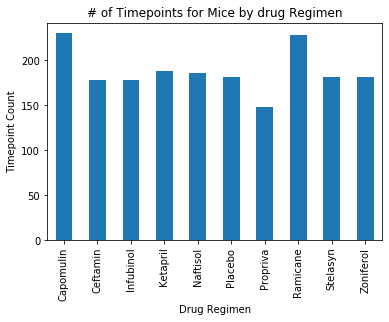

In [57]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pan_time = drugs['Timepoint'].count()
pan_time

pan_time.plot(kind="bar",ylabel="Timepoint Count", title = "# of Timepoints for Mice by drug Regimen")


['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


Text(0.5, 0, 'Drug Regimen')

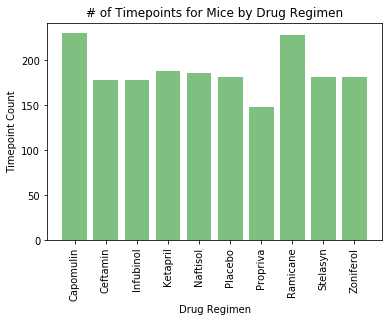

In [58]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# # Create an array that contains the number of users each language has
# users = [13000, 26000, 52000, 30000, 9000]
# x_axis = np.arange(len(users))
#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
# Tell matplotlib where we would like to place each of our x axis headers
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])
# # Sets the x limits of the current chart
# plt.xlim(-0.75, len(x_axis)-0.25)
# # Sets the y limits of the current chart
# plt.ylim(0, max(users)+5000)

# create y axis
pyplot_timepoints = pan_time.tolist()
pyplot_timepoints
# create x axis
x = np.arange(len(pan_time))
x
 

plt.bar(x,pyplot_timepoints,color='g',alpha=0.5, align = "center")

#get names for drugs quickly
d_names = sorted(d_names)
print(d_names)
ticks = [value for value in x]
plt.xticks(ticks,['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol'],rotation="vertical")
plt.title("# of Timepoints for Mice by Drug Regimen")
plt.ylabel("Timepoint Count")
plt.xlabel("Drug Regimen")





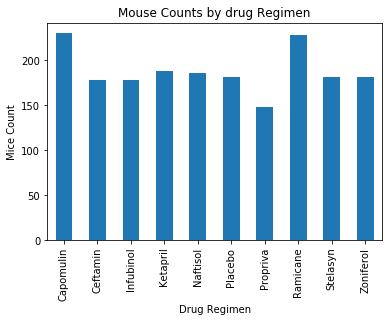

In [59]:
# plot the mouse counts for each drug using pandas
pan_mice = drugs['Mouse ID'].count()
pan_mice

pan_mice.plot(kind="bar",ylabel="Mice Count", title = "Mouse Counts by drug Regimen")

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


Text(0.5, 0, 'Drug Regimen')

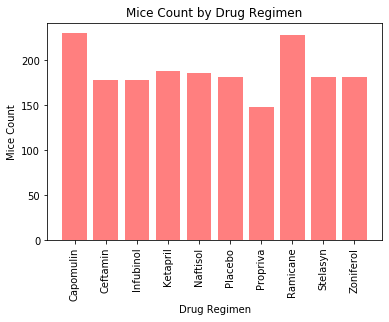

In [60]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen

pyplot_mice = pan_mice.tolist()
pyplot_mice
# create x axis
xp = np.arange(len(pan_mice))
xp
 

plt.bar(xp,pyplot_mice,color='r',alpha=0.5, align = "center")

#get names for drugs quickly
d_names = sorted(d_names)
print(d_names)
ticks = [value for value in x]
plt.xticks(ticks,['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol'],rotation="vertical")
plt.title("Mice Count by Drug Regimen")
plt.ylabel("Mice Count")
plt.xlabel("Drug Regimen")

In [61]:
pan_time
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

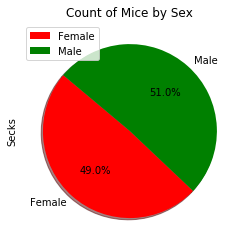

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_time=clean_data_merged.groupby(['Sex'])
piece = pie_time['Mouse ID'].count()
total_sex = piece.sum()
pieces = pd.DataFrame(piece)
pieces.columns= ['Total Count']


o = (pieces['Total Count']/total_sex)*100
pieces['% of Total Pop']=o
#pieper = piece.value_counts(normalize=True).round(+3)
#pieper
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

pie1=pieces.plot.pie(y='Total Count', colors = ['red','green'],autopct="%1.1f%%", shadow=True, startangle=140,title = 'Count of Mice by Sex',ylabel='Secks' )
#for visual b/c idk how to change legend location with only pandas
plt.legend(loc='upper left')


Text(0.5, 0, 'Counts')

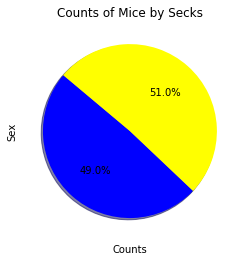

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(piece, colors = ['blue','yellow'],autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Counts of Mice by Secks")
plt.ylabel('Sex')
plt.xlabel('Counts')




## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
index_drug=clean_data_merged.set_index('Drug Regimen')
#drug_select = index_drug.filter(items = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],axis=0)
#drug_select
d_select = index_drug.drop(labels=['Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol'], axis=0)
d_select


# isolated view of just capomulin for later use
cap_select = index_drug.drop(labels = ['Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], axis=0)
cap_select
# Reset index so drug regimen column persists after inner merge
cap_select = cap_select.reset_index()
cap_select
d_select = d_select.reset_index()
d_select
# get mouse count per drug
mouse_cnt=d_select.groupby(['Drug Regimen'])
mouse_cnt=mouse_cnt['Mouse ID'].count()
mouse_cnt



Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ramicane     228
Name: Mouse ID, dtype: int64

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#select_t = clean_data_merged['Drug Regimen'].filter(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# Start by getting the last (greatest) timepoint for each mouse
by_ID= clean_data_merged.groupby(['Mouse ID'])
max_time = by_ID['Timepoint'].max()
max_time_df=pd.DataFrame(max_time)
max_time_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
qq1= pd.merge(max_time_df, d_select, on = ['Mouse ID','Timepoint'],how='inner')
qq1
qq1_to_match_example_output = qq1.set_index('Mouse ID')
qq1_to_match_example_output

,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,45,Infubinol,Female,20,23,67.973419,2
a251,45,Infubinol,Female,21,25,65.525743,1
a275,45,Ceftamin,Female,20,28,62.999356,3
a411,45,Ramicane,Male,3,22,38.407618,1
a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...
y769,45,Ceftamin,Female,6,27,68.594745,4
y793,45,Capomulin,Male,17,17,31.896238,2
y865,45,Ceftamin,Male,23,26,64.729837,3


In [66]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers
select_treats = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
colors = ['red','green','blue','yellow']


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes

# Create empty list to fill with tumor vol data (for plotting)
vol1 = []



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in select_treats:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finaltumorvol = qq1.loc[qq1['Drug Regimen']== t, 'Tumor Volume (mm3)']
    med = finaltumorvol.median()
    m = finaltumorvol.mean()
    # add subset 
    vol1.append(finaltumorvol)
    
    # Determine outliers using upper and lower bounds
    quartiles = finaltumorvol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerb= lowerq - (1.5*iqr)
    upperb= upperq + (1.5*iqr)
    outliers = finaltumorvol.loc[(finaltumorvol < lowerb)|(finaltumorvol > upperb)]
    print(f"{t}'s lower quartile of Tumor Volume is: {lowerq}")
    print(f"{t}'s upper quartile of Tumor Volume is: {upperq}")
    print(f"{t}'s interquartile range of Tumor Volume is: {iqr}")
    print(f"{t}'s the median of Tumor Volume is: {med}")
    print(f"{t}'s the mean of Tumor Volume is: {m}")
    print(f"Values below {lowerb} could be outliers. ")
    print(f"Values above {upperb} could be outliers. ")
    print(f"\n\t")
    
    
    
    
# The lower quartile of Tumor Volume is: 37.187743802499995
# The upper quartile of Tumor Volume is: 59.930261755000004
# The interquartile range of Tumor Volume is: 22.74251795250001
# The the median of Tumor Volume is: 45.0 
# Values below 3.0739668737499812 could be outliers.
# Values above 94.04403868375002 could be outliers.    

Capomulin's lower quartile of Tumor Volume is: 32.37735684
Capomulin's upper quartile of Tumor Volume is: 40.1592203
Capomulin's interquartile range of Tumor Volume is: 7.781863460000004
Capomulin's the median of Tumor Volume is: 38.1251644
Capomulin's the mean of Tumor Volume is: 36.6675677192
Values below 20.70456164999999 could be outliers. 
Values above 51.83201549 could be outliers. 

	
Ramicane's lower quartile of Tumor Volume is: 31.56046955
Ramicane's upper quartile of Tumor Volume is: 40.65900627
Ramicane's interquartile range of Tumor Volume is: 9.098536719999998
Ramicane's the median of Tumor Volume is: 36.56165229
Ramicane's the mean of Tumor Volume is: 36.1913904284
Values below 17.912664470000003 could be outliers. 
Values above 54.30681135 could be outliers. 

	
Infubinol's lower quartile of Tumor Volume is: 54.04860769
Infubinol's upper quartile of Tumor Volume is: 65.52574285
Infubinol's interquartile range of Tumor Volume is: 11.477135160000003
Infubinol's the median 

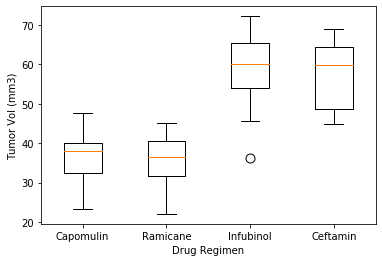

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(color ="orange", markersize = 9 )
plt.boxplot(vol1, labels = select_treats, flierprops = orange_out)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Vol (mm3)")
plt.show()


In [68]:
cap_select

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,s185,Female,3,17,0,45.000000,0
1,Capomulin,s185,Female,3,17,5,43.878496,0
2,Capomulin,s185,Female,3,17,10,37.614948,0
3,Capomulin,s185,Female,3,17,15,38.177232,0
4,Capomulin,s185,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
225,Capomulin,i557,Female,1,24,45,47.685963,1
226,Capomulin,r157,Male,22,25,0,45.000000,0
227,Capomulin,r157,Male,22,25,5,45.597064,0
228,Capomulin,r157,Male,22,25,10,46.059608,0


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

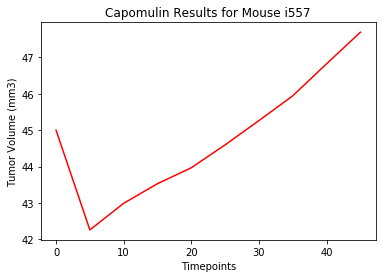

In [69]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#does this mean all mice or one mouse?
#creating for Mouse ID i557
# according to examp x is timepoint and y is tumor volume
q1_line = cap_select.loc[cap_select["Mouse ID"]=="i557"]
q1_line

cap_x=q1_line['Timepoint']
cap_y=q1_line['Tumor Volume (mm3)']

plt.plot(cap_x,cap_y, color='red')
plt.title("Capomulin Results for Mouse i557")
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
#we can 'check' that off. lol



Text(0, 0.5, 'Avg Tumor Volume (mm3)')

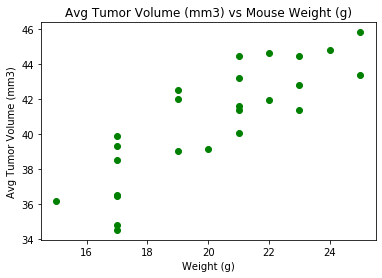

In [70]:
# Generate a scatter plot of average tumor volume (y) vs. mouse weight (x) for the Capomulin regimen
cap_by_ID = cap_select.groupby('Mouse ID')
#finding avg tumor volume
mean_t_cap = cap_by_ID['Tumor Volume (mm3)'].mean()
mean_t_cap
#finding different possible mouse weights
weights_cap = cap_by_ID['Weight (g)'].unique()
weights_cap

#plotting scatter
plt.scatter(weights_cap,mean_t_cap,color='green')
plt.title('Avg Tumor Volume (mm3) vs Mouse Weight (g)')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')



## Correlation and Regression

In [74]:
# # Print out the r-squared value along with the plot.
# x_values = housing_data['RM']
# y_values = housing_data['MEDV']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# print(f"The r-squared is: {rvalue**2}")
# plt.show()
#preparing x and y for regression line
weight_cap = pd.DataFrame(weights_cap) 
weight_cap = weight_cap.reset_index()
grams = weight_cap['Weight (g)']
grams

#weights_cap_list = grams.tolist() 
#mean_t_cap_list = mean_t_cap.tolist()
# print(grams)
#print(mean_t_cap_list)

#weights_cap_list = pd.DataFrame(weights_cap_list)
flgrams= grams.astype(float)
#print(mean_t_cap)
#print(flgrams)




The correlation coefficient between these two factors is: 0.84


Text(0, 0.5, 'Avg Tumor Volume (mm3)')

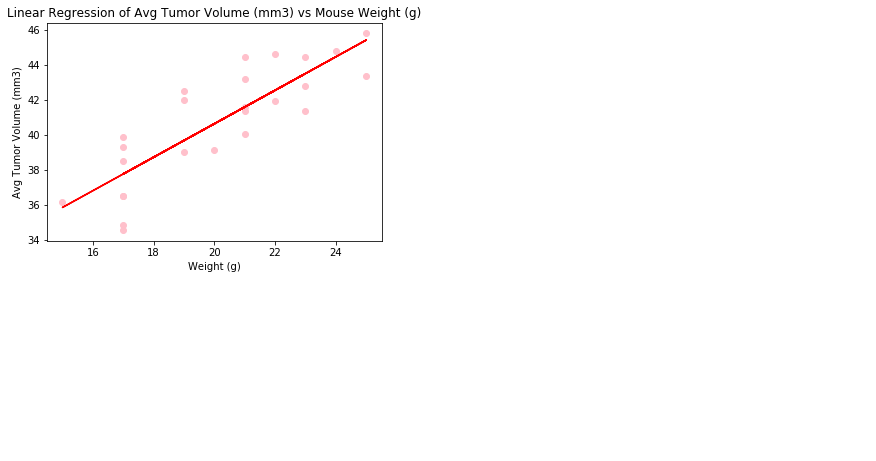

In [75]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
x_reg = flgrams
y_reg = mean_t_cap

# establish linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg, y_reg)
reg_values = x_reg*slope+intercept

# linear regression line and correlation coefficient
reg_line =  "y = " + str(round(slope,2))+ "x + "+str(round(intercept,2))
corrcoef = st.pearsonr(x_reg,y_reg)
r_corrcoef = corrcoef[0].round(2)

#print St. Pearson Correlation Coefficient
print(f"The correlation coefficient between these two factors is: {r_corrcoef}")

# scatter plot of the data

plt.scatter(weights_cap,mean_t_cap,color='pink')
plt.plot(flgrams,reg_values,"r-")
plt.annotate(reg_line,(37,22),fontsize=15, color = 'green')
plt.title('Linear Regression of Avg Tumor Volume (mm3) vs Mouse Weight (g)')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')


In [73]:
# #notes
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
# https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
# https://stackoverflow.com/questions/38862587/pandas-dataframe-drop-all-the-rows-based-one-column-value-with-python/38862638
# https://gt.bootcampcontent.com/GT-Coding-Boot-Camp/gt-virt-atl-data-pt-09-2021-u-c-b/-/tree/main/02-Homework/05-Matplotlib/Instructions
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html
# https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart
# https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/#example-of-left-merge-left-join
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
# https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones
# https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones/45846274#45846274
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
# https://datatofish.com/filter-pandas-dataframe/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html